In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

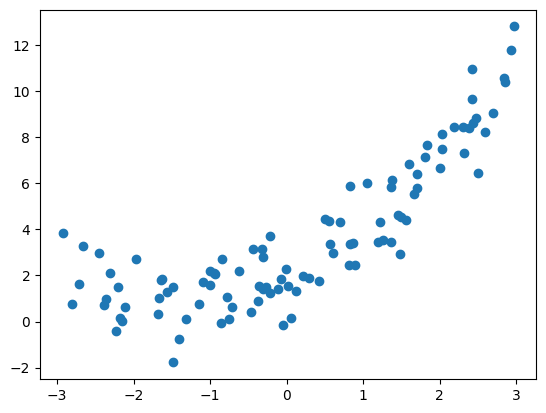

In [2]:
X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100,1)

plt.scatter(X,y)



## Using Linear Regression

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
regression1 = LinearRegression()
regression1.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
y_pred = regression1.predict(X_test)

In [17]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.5730519250761719

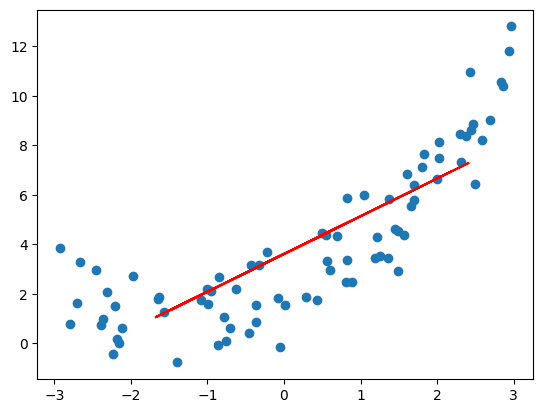

In [30]:
# Visualisation
plt.scatter(X_train, y_train)
plt.plot(X_test,regression1.predict(X_test),color='r')

## Using Polynomial Regression

### Degree 2

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [32]:
X_test_poly

array([[ 1.00000000e+00, -1.31112264e+00,  1.71904257e+00],
       [ 1.00000000e+00,  1.37416506e+00,  1.88832961e+00],
       [ 1.00000000e+00,  1.23311739e-01,  1.52057850e-02],
       [ 1.00000000e+00, -2.73958914e-01,  7.50534863e-02],
       [ 1.00000000e+00, -1.07614502e-01,  1.15808811e-02],
       [ 1.00000000e+00,  2.16075334e-01,  4.66885498e-02],
       [ 1.00000000e+00, -3.05761957e-01,  9.34903744e-02],
       [ 1.00000000e+00,  6.21819791e-02,  3.86659853e-03],
       [ 1.00000000e+00, -1.66508118e+00,  2.77249535e+00],
       [ 1.00000000e+00, -1.14902602e+00,  1.32026080e+00],
       [ 1.00000000e+00,  2.41966490e+00,  5.85477821e+00],
       [ 1.00000000e+00, -3.12866874e-01,  9.78856806e-02],
       [ 1.00000000e+00, -1.48618261e+00,  2.20873876e+00],
       [ 1.00000000e+00, -8.57418870e-03,  7.35167118e-05],
       [ 1.00000000e+00,  8.62419742e-01,  7.43767812e-01],
       [ 1.00000000e+00, -2.24427782e-01,  5.03678294e-02],
       [ 1.00000000e+00, -1.48658600e+00

In [33]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test,y_pred)
score

0.8619853699219753

In [34]:
regression.coef_

array([[0.        , 1.44696356, 0.52995798]])

In [35]:
regression.intercept_

array([2.03906879])

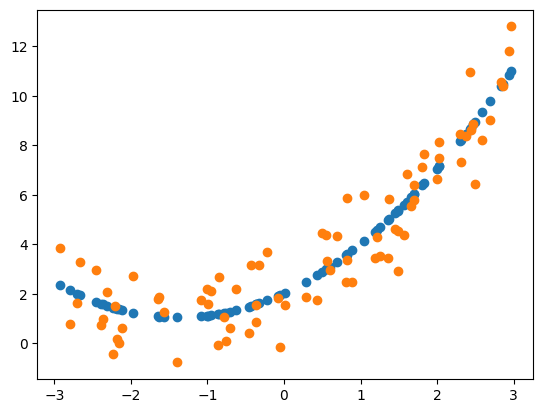

In [46]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

### Degree 3

In [47]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [50]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [52]:
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
score

0.8543194966504255

## Prediction with new Data-set

In [54]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)

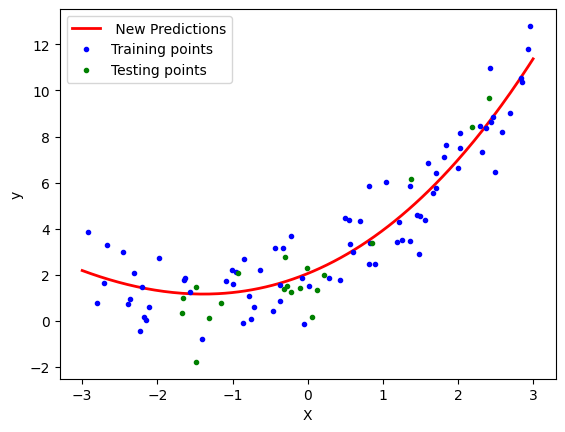

In [57]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()